## Dependencias

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

## Cargar los datos

In [1]:
# Cargar el archivo TIFF
file_path = '/Users/ortega/Downloads/clase/a_interes.tif'
src = rasterio.open(file_path)

# Mostrar la ruta del archivo cargado
print(f"Archivo cargado: {file_path}")

Archivo cargado: /Users/ortega/Downloads/clase/a_interes.tif


## Información general del raster

In [2]:
# Obtener dimensiones del archivo
width = src.width
height = src.height
bands = src.count

# Imprimir las dimensiones y el número de bandas
print(f"Dimensiones (ancho x alto): {width} x {height}")
print(f"Número de bandas: {bands}")


Dimensiones (ancho x alto): 3562 x 2060
Número de bandas: 3


In [16]:
src.read(1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Estadistica basica

Band 1 - Min: 0.0, Max: 34824.0, Mean: 4677.06298828125
Band 2 - Min: 0.0, Max: 34281.0, Mean: 4837.0107421875
Band 3 - Min: 0.0, Max: 33754.0, Mean: 4331.4921875


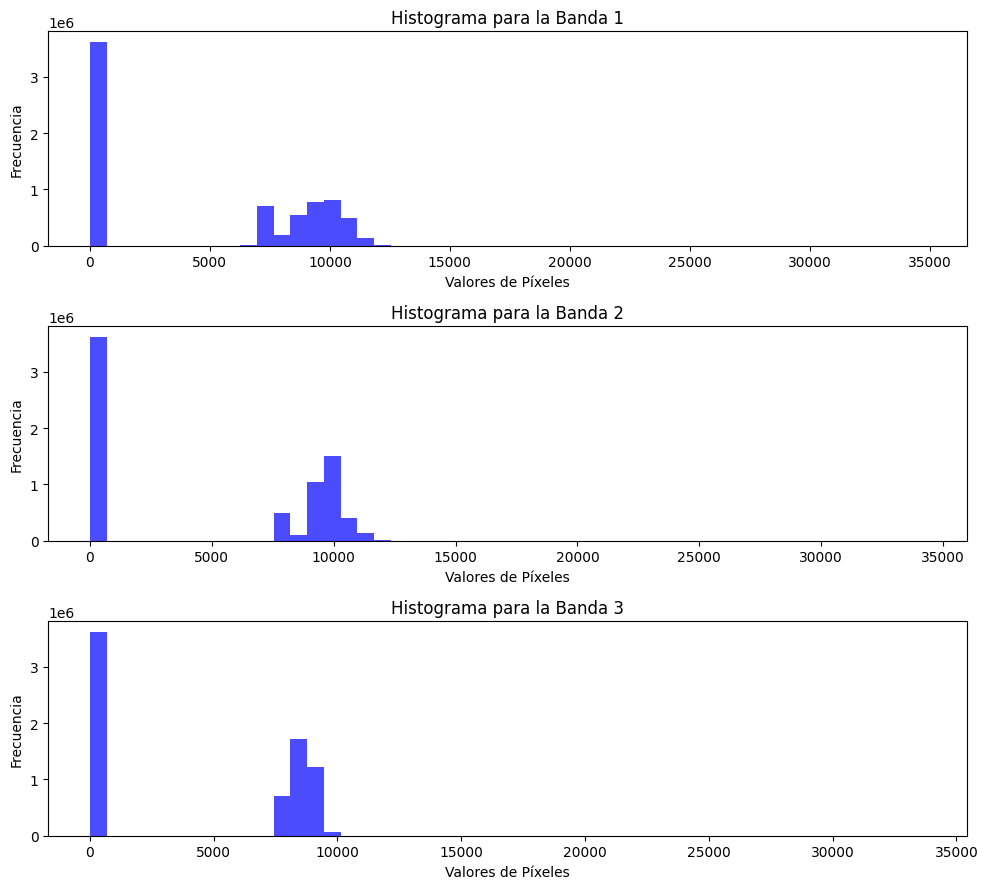

In [3]:
# Crear una figura para los histogramas
plt.figure(figsize=(10, bands * 3))

# Analizar cada banda
for i in range(1, bands + 1):
    # Leer la banda i
    band_data = src.read(i)
    
    # Calcular estadísticas básicas
    min_value = np.min(band_data)
    max_value = np.max(band_data)
    mean_value = np.mean(band_data)
    
    # Imprimir estadísticas
    print(f"Band {i} - Min: {min_value}, Max: {max_value}, Mean: {mean_value}")
    
    # Crear histograma para la banda
    plt.subplot(bands, 1, i)
    plt.hist(band_data.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f'Histograma para la Banda {i}')
    plt.xlabel('Valores de Píxeles')
    plt.ylabel('Frecuencia')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()
plt.show()


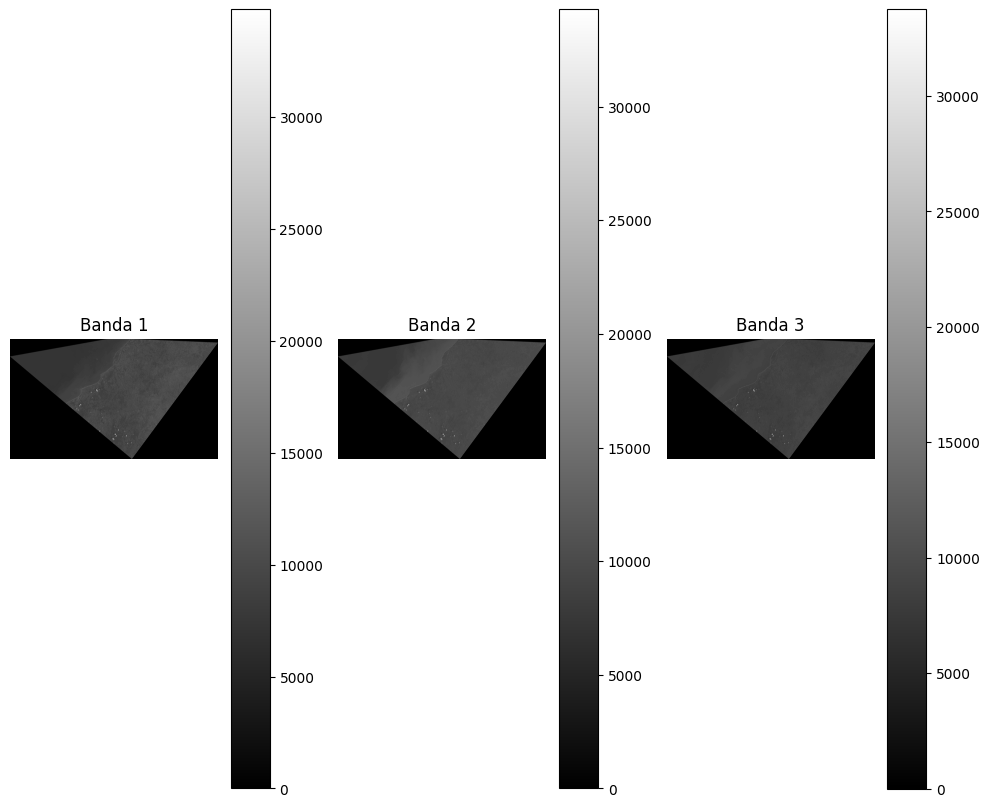

In [4]:
# Crear una figura para visualizar cada banda
plt.figure(figsize=(10, bands * 5))

# Visualizar cada banda
for i in range(1, bands + 1):
    band_data = src.read(i)  # Leer los datos de la banda i
    
    # Crear un subplot para cada banda
    plt.subplot(1, bands, i)
    plt.imshow(band_data, cmap='gray')
    plt.title(f'Banda {i}')
    plt.colorbar()
    plt.axis('off')

# Mostrar las imágenes de las bandas
plt.tight_layout()
plt.show()

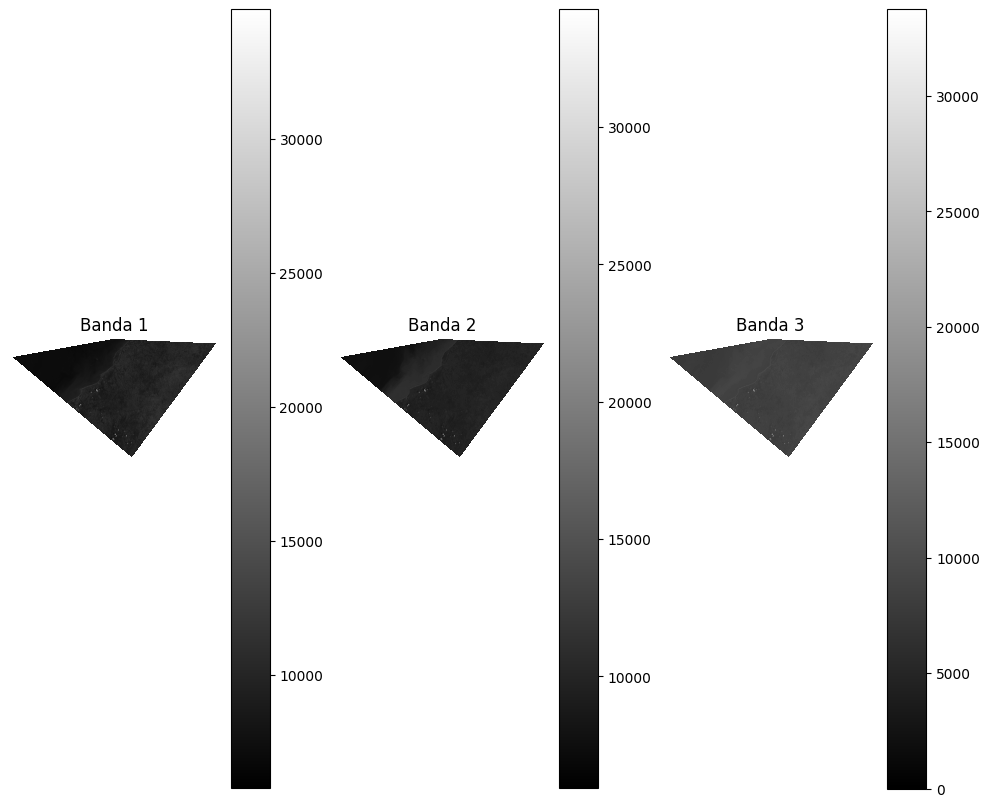

In [9]:
# Leer las bandas para los canales RGB (o las bandas que estés analizando)
red_band = src.read(1)    # Banda 4 corresponde al Rojo (Red)
green_band = src.read(2)  # Banda 3 corresponde al Verde (Green)
blue_band = src.read(3)   # Banda 2 corresponde al Azul (Blue)

# Crear una máscara donde los valores de las tres bandas sean 0 simultáneamente
mask = (red_band == 0) & (green_band == 0) & (blue_band == 0)

# Crear una figura para visualizar cada banda
plt.figure(figsize=(10, 3 * 5))

# Visualizar cada banda
for i in range(1, 4):  # Asumiendo que solo visualizamos 3 bandas (RGB)
    if i == 1:
        band_data = red_band  # Banda roja
    elif i == 2:
        band_data = green_band  # Banda verde
    elif i == 3:
        band_data = blue_band  # Banda azul
    
    # Aplicar la máscara: donde las tres bandas sean 0, reemplazar con NaN
    band_masked = np.where(mask, np.nan, band_data)
    
    # Crear un subplot para cada banda
    plt.subplot(1, 3, i)
    
    # Mostrar la imagen aplicando la máscara y un colormap adecuado (transparente en NaN)
    plt.imshow(band_masked, cmap='gray')
    plt.title(f'Banda {i}')
    plt.colorbar()
    plt.axis('off')

# Mostrar las imágenes de las bandas
plt.tight_layout()
plt.show()

Band 1 - Min (sin ceros): 5777.0, Max: 34824.0, Mean: 9247.783203125
Band 2 - Min (sin ceros): 5921.0, Max: 34281.0, Mean: 9564.0283203125
Band 3 - Min (sin ceros): 42.0, Max: 33754.0, Mean: 8564.5087890625


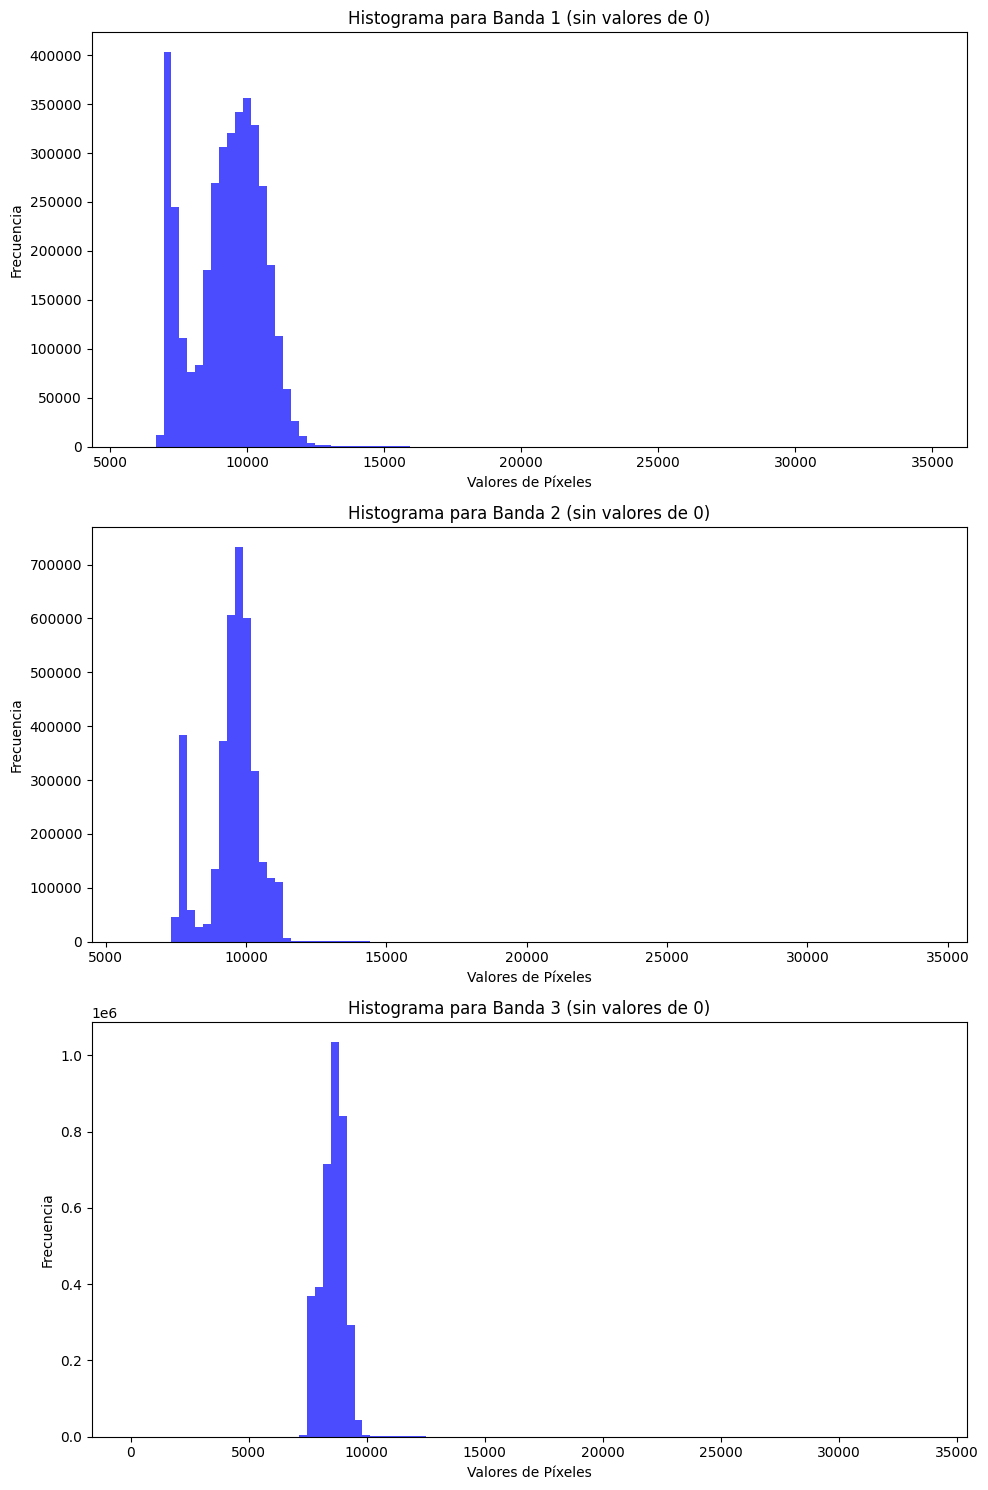

In [13]:
# Crear una figura para los histogramas
plt.figure(figsize=(10, bands * 5))

# Analizar cada banda
for i in range(1, bands + 1):
    # Leer la banda i
    band_data = src.read(i)
    
    # Filtrar los valores que no son 0
    valid_data = band_data[band_data > 0]
    
    # Calcular estadísticas básicas
    min_value = np.min(valid_data)
    max_value = np.max(valid_data)
    mean_value = np.mean(valid_data)
    
    # Imprimir estadísticas sin los ceros
    print(f"Band {i} - Min (sin ceros): {min_value}, Max: {max_value}, Mean: {mean_value}")
    
    # Crear histograma para la banda (sin los ceros)
    plt.subplot(bands, 1, i)
    plt.hist(valid_data, bins=100, color='blue', alpha=0.7)
    plt.title(f'Histograma para Banda {i} (sin valores de 0)')
    plt.xlabel('Valores de Píxeles')
    plt.ylabel('Frecuencia')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

Banda Rojo - Min: 5777.0, Max: 34824.0, Mean: 9247.783203125
Banda Verde - Min: 5921.0, Max: 34281.0, Mean: 9564.0283203125
Banda Azul - Min: 0.0, Max: 33754.0, Mean: 8564.498046875


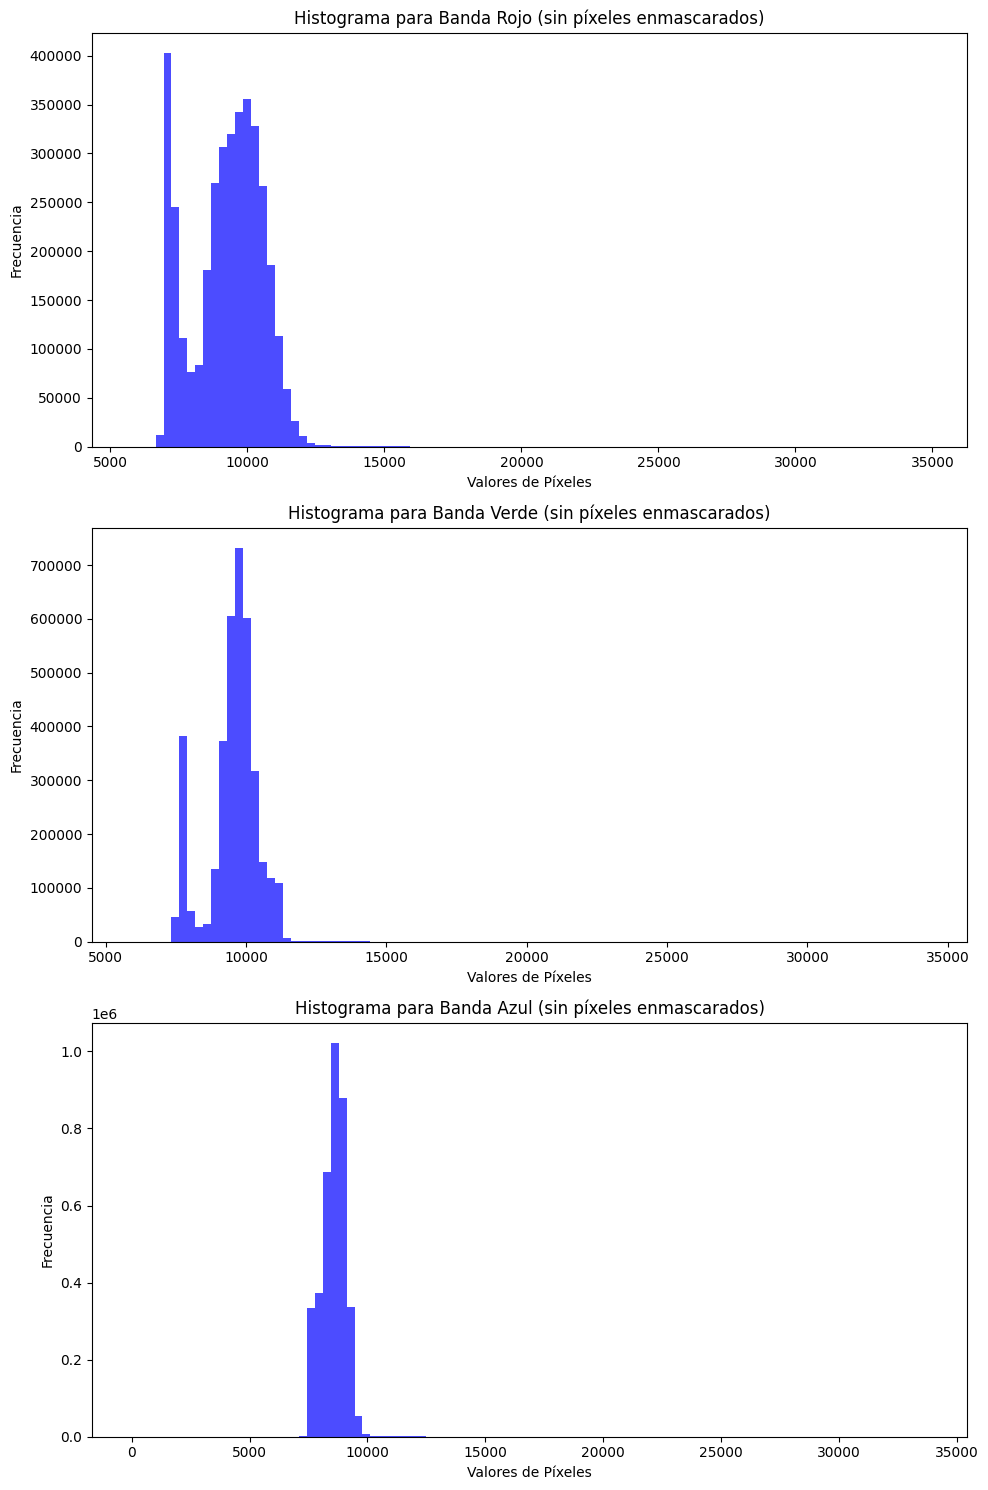

In [14]:
# Leer las bandas para los canales RGB
red_band = src.read(1)    # Banda 4 corresponde al Rojo (Red)
green_band = src.read(2)  # Banda 3 corresponde al Verde (Green)
blue_band = src.read(3)   # Banda 2 corresponde al Azul (Blue)

# Crear una máscara donde los valores de las tres bandas sean 0 simultáneamente
mask = (red_band == 0) & (green_band == 0) & (blue_band == 0)

# Crear una figura para los histogramas
plt.figure(figsize=(10, 3 * 5))

# Analizar cada banda (en este caso, asumiendo que solo visualizamos 3 bandas RGB)
for i in range(1, 4):  # 3 bandas (Rojo, Verde, Azul)
    if i == 1:
        band_data = red_band  # Banda roja
        band_name = 'Rojo'
    elif i == 2:
        band_data = green_band  # Banda verde
        band_name = 'Verde'
    elif i == 3:
        band_data = blue_band  # Banda azul
        band_name = 'Azul'
    
    # Aplicar la máscara: donde las tres bandas sean 0, excluir los píxeles
    valid_data = band_data[~mask]  # Filtrar los píxeles donde las tres bandas no son cero

    # Calcular estadísticas básicas
    min_value = np.min(valid_data)
    max_value = np.max(valid_data)
    mean_value = np.mean(valid_data)
    
    # Imprimir estadísticas sin los píxeles enmascarados
    print(f"Banda {band_name} - Min: {min_value}, Max: {max_value}, Mean: {mean_value}")
    
    # Crear histograma para la banda (sin los píxeles enmascarados)
    plt.subplot(3, 1, i)
    plt.hist(valid_data, bins=100, color='blue', alpha=0.7)
    plt.title(f'Histograma para Banda {band_name} (sin píxeles enmascarados)')
    plt.xlabel('Valores de Píxeles')
    plt.ylabel('Frecuencia')

# Mostrar los histogramas
plt.tight_layout()
plt.show()